# Fotometría de apertura CZ Aqr


## 1. Inspección de la imagen

La imagen de CZ Aqr utilizada fue tomada por uno de los telescopios de la red <a href="https://lco.global/">LCOGT</a> (Las Cumbres Observatory Global Network). 

In [1]:
from astropy.io import fits, ascii

filename = '16.fz'
hdu = fits.open(filename)
type(hdu)

astropy.io.fits.hdu.hdulist.HDUList

In [2]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [4]:
hdu = hdu[1]

In [5]:
epoch = hdu.header.get('DATE-OBS')
filter = hdu.header.get('FILTER')
naxis1 = hdu.header.get('NAXIS1')
naxis2 = hdu.header.get('NAXIS2')

print(f'Image {naxis1}x{naxis2} taken on {epoch}, with the {filter} filter.')

Image 3054x2042 taken on 2021-10-09T21:25:33.808, with the V filter.


Evaluación del nivel de cielo (<em>background</em>):
Usaremos aqui un metodo de <a href="https://www.gnu.org/software/gnuastro/manual/html_node/Sigma-clipping.html">sigma clipping</a> para rechazar los valores atípicos.

In [6]:
from astropy.nddata import Cutout2D

# Definition of cutout
position = (1500,1000)
size = (600, 600)

# Cutout
cutout = Cutout2D(hdu.data, position=position, size=size)
zoom_hdu = hdu.copy()
zoom_hdu.data = cutout.data

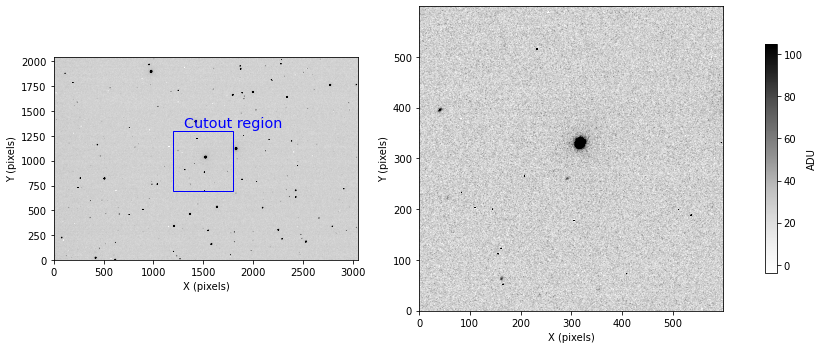

In [7]:
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt

# Compute background statistics
bkg_mean, bkg_median, bkg_sigma = sigma_clipped_stats(hdu.data, sigma=3.0)

# Create figure
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# Plot image
im = ax[0].imshow(hdu.data, cmap='Greys', origin='lower',
          vmin=bkg_median-2*bkg_sigma, 
          vmax=bkg_median+5*bkg_sigma )
ax[0].set_xlabel('X (pixels)')
ax[0].set_ylabel('Y (pixels)')

# Indicate cutout location
rect = plt.Rectangle( [position[0]-size[0]/2., position[1]-size[1]/2.], size[0], size[1], edgecolor='b', facecolor='None' )
ax[0].add_patch(rect)
ax[0].text( position[0]+size[0]/2., position[1]+size[1]/2.+40, 'Cutout region', color='b',fontsize='x-large', ha='center')

# Plot cutout
im = ax[1].imshow(zoom_hdu.data, cmap='Greys', origin='lower',
          vmin=bkg_median-2*bkg_sigma, 
          vmax=bkg_median+5*bkg_sigma )
ax[1].set_xlabel('X (pixels)')
ax[1].set_ylabel('Y (pixels)')
fig.colorbar(im, ax=ax, shrink=0.6, label='ADU' )

In [8]:
from astropy.wcs import WCS
wcs = WCS(hdu.header)
wcs

Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.584278135  -15.9407401695  
CRPIX : 1527.5  1021.5  
CD1_1 CD1_2  : 5.69505996667e-07  0.00015851999571  
CD2_1 CD2_2  : -0.00015851999571  5.69505996667e-07  
NAXIS : 3054  2042

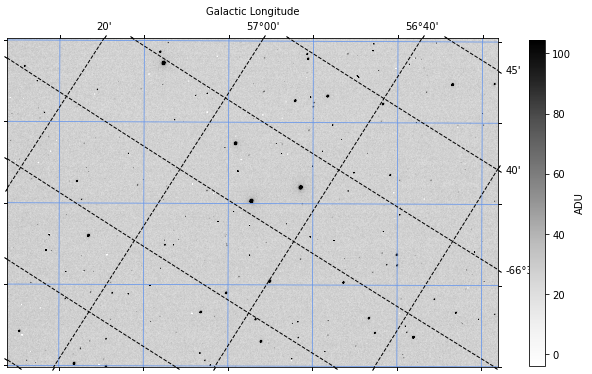

In [9]:
from astropy import units as u

# Define figure & projection
fig = plt.figure(figsize=(11,10))
ax = plt.subplot(projection=wcs,)

# Display image
im = ax.imshow(hdu.data, cmap='Greys', origin='lower', 
               vmin=bkg_median-2*bkg_sigma, 
               vmax=bkg_median+5*bkg_sigma )

# Setup axes
lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel('Right ascension', color='Cornflowerblue')
lat.set_axislabel('Declination', color='Cornflowerblue')

lon.set_ticks(spacing=5.* u.arcmin)
lat.set_ticks(spacing=5.* u.arcmin)
lon.set_ticklabel_position('bt')
lat.set_ticklabel_position('lr')
lon.set_major_formatter('dd:mm')
lat.set_major_formatter('dd:mm')

ax.grid(color='Cornflowerblue', linestyle='solid', alpha=0.95)
overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='black', ls='--', lw=1)
overlay[0].set_axislabel('Galactic Longitude')
overlay[1].set_axislabel(' ')
fig.colorbar(im, ax=ax, shrink=0.6, label='ADU' )

In [10]:
cutout = Cutout2D(hdu.data, position=position, size=size, wcs=wcs)

# Store cutout in HDU and update WCS
zoom_hdu = hdu.copy()
zoom_hdu.data = cutout.data
zoom_hdu.header.update(cutout.wcs.to_header())
zoom_wcs = WCS(zoom_hdu.header)

Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


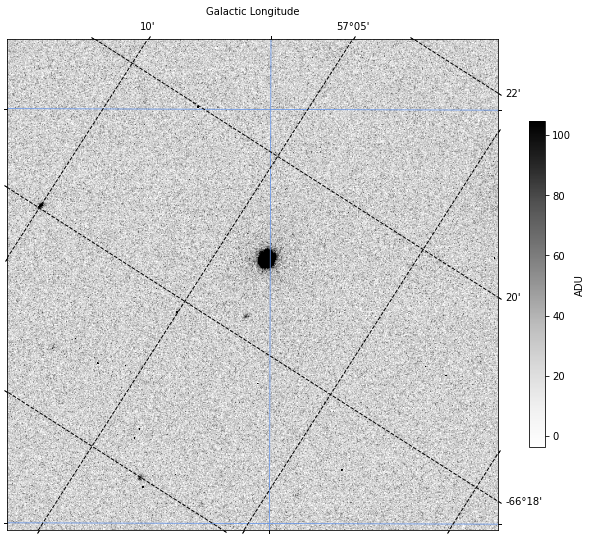

In [11]:
from astropy import units as u

# Define figure & projection
fig = plt.figure(figsize=(11,10))
ax = plt.subplot(projection=wcs,)

# Display image
im = ax.imshow(zoom_hdu.data, cmap='Greys', origin='lower', 
               vmin=bkg_median-2*bkg_sigma, 
               vmax=bkg_median+5*bkg_sigma )

# Setup axes
lon = ax.coords[0]
lat = ax.coords[1]

lon.set_axislabel('Right ascension', color='Cornflowerblue')
lat.set_axislabel('Declination', color='Cornflowerblue')

lon.set_ticks(spacing=5.* u.arcmin)
lat.set_ticks(spacing=5.* u.arcmin)
lon.set_ticklabel_position('bt')
lat.set_ticklabel_position('lr')
lon.set_major_formatter('dd:mm')
lat.set_major_formatter('dd:mm')

ax.grid(color='Cornflowerblue', linestyle='solid', alpha=0.95)
overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='black', ls='--', lw=1)
overlay[0].set_axislabel('Galactic Longitude')
overlay[1].set_axislabel(' ')
fig.colorbar(im, ax=ax, shrink=0.6, label='ADU' )

## 2. Detección de las fuentes

El paquete <kbd>photutils</kbd> ofrece módulos muy prácticos para la detección de fuentes, su fotometría, <em>etc</em>. 
Se realizará la fotometria de apertura utilizando el detector de fuentes DAOPHOT.

In [17]:
from photutils import DAOStarFinder

daofind = DAOStarFinder(fwhm=6, threshold=bkg_median+5*bkg_sigma)
sources = daofind(hdu.data)
print('Number of sources detected: {:d}'.format(len(sources)))
print('\n')

sources

Number of sources detected: 87




id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
1,612.689031329527,2.233351334663244,0.5260220647547437,0.5870630253223239,0.13595973639228995,49,0.0,1644.8917236328125,24.081219604606506,-3.454196195473796
2,415.1208255218963,22.167545828043128,0.5863214657671806,0.7986988218238088,0.30418136516114447,49,0.0,4563.7509765625,60.94233358234844,-4.462297700140545
3,1227.9141904990347,41.2381132369619,0.5015718832134896,0.8531665016286964,0.3101468861295537,49,0.0,261.8184814453125,3.4488830089186964,-1.344196156806573
4,185.91714132448567,49.42395444635956,0.6874535676269705,-0.016234599324570304,0.3050676067113466,49,0.0,117.31404876708984,1.3778337837463381,-0.34799207303686636
5,599.9535133274479,49.54081146119617,0.26439396919787594,0.29000252332347415,-0.09974785637874664,49,0.0,74.83948516845703,1.0022730127548365,-0.002465091709492305
6,2164.039991804006,129.73266588599046,0.8248198384436259,0.9409406836198928,0.35172394165184884,49,0.0,161.17120361328125,1.448912083873411,-0.4026050860951208
7,1575.2274439861014,158.63080590905042,0.507100394725189,0.9060580614346229,0.2265479179747981,49,0.0,3021.125732421875,42.34298797972947,-4.066953753086728
8,513.6444502943614,161.57554422304693,0.34820688925177234,0.3508067311058975,0.19686508023069899,49,0.0,193.444580078125,4.253239402047702,-1.5717995713289752
9,613.9896431296127,174.54168258539954,0.5679288692417603,0.8071588493495313,0.27019524371123665,49,0.0,380.0870361328125,4.897245534446335,-1.7248796972427791


In [18]:
# Selection and edition of the centroids
zoom_sources = sources[ (sources['xcentroid']>(position[0]-size[0]/2)) &
                        (sources['xcentroid']<(position[0]+size[0]/2)) &
                        (sources['ycentroid']>(position[1]-size[1]/2)) &
                        (sources['ycentroid']<(position[1]+size[1]/2)) 
                      ]
zoom_sources['xcentroid'] -= (position[0]-size[0]/2)
zoom_sources['ycentroid'] -= (position[1]-size[1]/2)

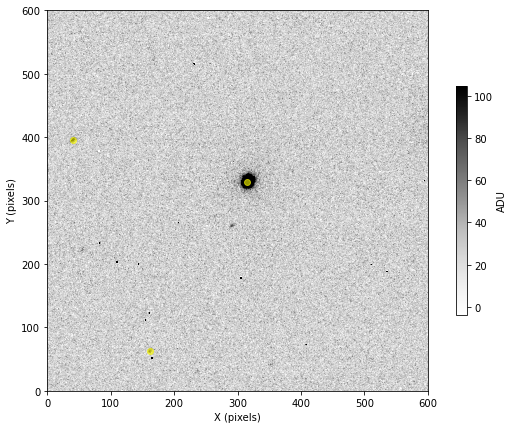

In [19]:
fig, ax = plt.subplots(figsize=(10,7))

# Show cutout
im= ax.imshow(zoom_hdu.data, cmap='Greys', origin='lower', 
              vmin=bkg_median-2*bkg_sigma, 
              vmax=bkg_median+5*bkg_sigma)

# Overlap detected sources
ax.scatter(zoom_sources['xcentroid'], zoom_sources['ycentroid'],
            alpha=0.6, color='yellow')

ax.set_xlim([0,size[0]])
ax.set_ylim([0,size[1]])
ax.set_xlabel('X (pixels)')
ax.set_ylabel('Y (pixels)')
fig.colorbar(im, ax=ax, shrink=0.6, label='ADU' )

## 3. Fotometría de apertura

Se procedió a medir el flujo de cada fuente por el método de <em>fotometría de apertura</em>. 

### 3.1. Elección de la apertura

Para ello se ajusta un perfil gaussiano sobre una fuente aleatoria:

In [21]:
import numpy as np

# Define 1D Gaussian function
def gaus(x,a,x0,sigma):
    return (a/np.sqrt(2*np.pi*sigma*sigma))*np.exp(-(x-x0)**2/(2*sigma**2))

Peak  : 750912
FWHM  : 6.02
Center: 24.89


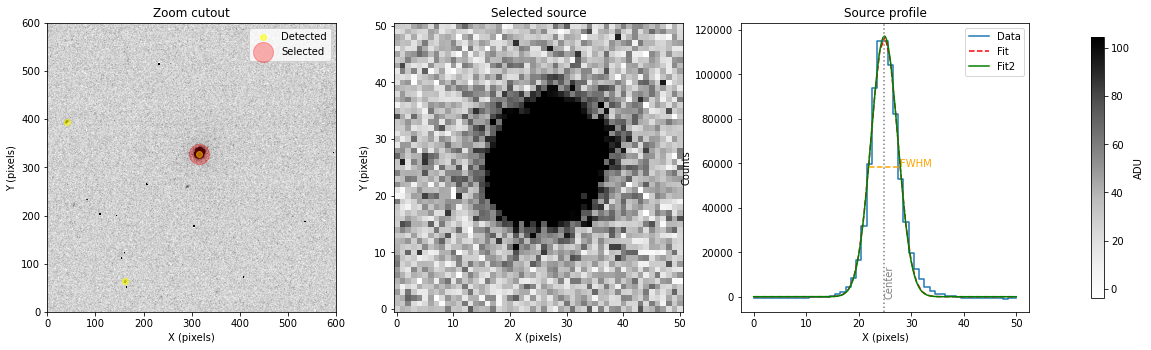

In [22]:
from scipy.optimize import curve_fit


# Randomly choose a source far enough from edges
src_sel = np.random.randint(0,len(zoom_sources))
src_pos = (zoom_sources[src_sel]['xcentroid'], zoom_sources[src_sel]['ycentroid'])
src_siz = 51
while (src_pos[0]<src_siz) or (src_pos[1]<src_siz) or \
      ((zoom_hdu.data.shape[0]-src_pos[0])<src_siz) or \
      ((zoom_hdu.data.shape[1]-src_pos[1])<src_siz):
    src_sel = np.random.randint(0,len(zoom_sources))
    src_pos = (zoom_sources[src_sel]['xcentroid'], zoom_sources[src_sel]['ycentroid'])


# Cutout
src_cut = Cutout2D(zoom_hdu.data, position=src_pos, size=src_siz)
xc = src_siz/2. 
yc = src_siz/2.


fig, ax = plt.subplots(1,3, figsize=(22,8))

# Zoom cutout
im= ax[0].imshow(zoom_hdu.data, cmap='Greys', origin='lower', 
                vmin=bkg_median-2*bkg_sigma, 
                vmax=bkg_median+5*bkg_sigma)
# Overlap detected sources
ax[0].scatter(zoom_sources['xcentroid'], zoom_sources['ycentroid'], alpha=0.6, color='yellow', label='Detected')
ax[0].scatter(zoom_sources[src_sel]['xcentroid'], zoom_sources[src_sel]['ycentroid'], s=400, facecolor='red', alpha=0.3, label='Selected')
ax[0].set_xlim([0,size[0]])
ax[0].set_ylim([0,size[1]])
ax[0].set_xlabel('X (pixels)')
ax[0].set_ylabel('Y (pixels)')
ax[0].legend(loc='best')
ax[0].set_title('Zoom cutout')


# Selection cutout
ax[1].imshow(src_cut.data, cmap='Greys', origin='lower', 
             vmin=bkg_median-2*bkg_sigma, 
             vmax=bkg_median+5*bkg_sigma)
ax[1].set_xlabel('X (pixels)')
ax[1].set_ylabel('Y (pixels)')
ax[1].set_title('Selected source')

# Source profile
x_arr = np.array([x for x in range(src_siz)])
x_sum = np.sum(src_cut.data,axis=1) 
x_sum = x_sum - np.median(x_sum)

# Adjust profile with Gaussian
param, _ = curve_fit(gaus, x_arr, x_sum, p0=[np.max(src_cut.data),src_siz/2.,5])
fwhm = np.abs(param[2])*2.355
gaus_model = gaus(x_arr,*param)

ax[2].step(x_arr, x_sum, where='mid', label='Data')
ax[2].plot(x_arr, gaus_model, linestyle='--', color='red', label='Fit')

x2 = np.linspace(0,50,num=200)
g2 = gaus(x2,*param)
ax[2].plot(x2, g2, linestyle='-', color='green', label='Fit2')


ax[2].axvline(param[1], linestyle='dotted', color='grey')
ax[2].text(param[1], 0, 'Center', rotation=90, color='grey')
ax[2].plot(param[1] + [-fwhm/2., fwhm/2.], [np.max(gaus_model)/2., np.max(gaus_model)/2.], color='orange', linestyle='--')
ax[2].text(param[1] + fwhm/2., np.max(gaus_model)/2., 'FWHM', color='orange')

ax[2].set_xlabel('X (pixels)')
ax[2].set_ylabel('Counts')
ax[2].legend(loc='upper right')
asp = np.diff(ax[2].get_xlim())[0] / np.diff(ax[2].get_ylim())[0]
ax[2].set_aspect(asp)
ax[2].set_title('Source profile')

print('Peak  : {:.0f}'.format(param[0]))
print('FWHM  : {:.2f}'.format(fwhm))
print('Center: {:.2f}'.format(param[1]))

fig.colorbar(im, ax=ax, shrink=0.6, label='ADU' )

Se puede apreciar que el ancho a mitad del máximo (FWHM) está alrededor de 2.5-3 pixeles.
Ahora se definió una apertura de 1.5-2 veces el FWHM permite contabilizar todos los fotones de la fuentes, sin contar demasiados del cielo. 

In [23]:
aperture_radius = 2.0 * fwhm
annulus_radius= [aperture_radius+2,aperture_radius+5]

### 3.2. Fotometría de las fuentes

In [24]:
from photutils import (aperture_photometry,
                       CircularAperture,
                       CircularAnnulus)

# Defining apertures
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=aperture_radius)

In [25]:
phot_table = aperture_photometry(hdu.data, apertures)
print('Columns in phot_table: ', phot_table.colnames)

Columns in phot_table:  ['id', 'xcenter', 'ycenter', 'aperture_sum']


Se necesita restar la contribución del cielo para cada una de estas medidas.
Por ello se definió anillos alrededor de las fuentes, se calculó el valor de la mediana (no el promedio para que sea robusto para valores atípicos) de esos anillos (en ADU), y se restó estas medianas a los flujos integrados.

In [26]:
# Define annuli
annulus_aperture = CircularAnnulus(positions, 
                                   r_in=annulus_radius[0],
                                   r_out=annulus_radius[1])
annulus_masks = annulus_aperture.to_mask(method='center')

# For each source, compute the median (through sigma/clipping)
bkg_median_arr = []
for mask in annulus_masks:
    annulus_data = mask.multiply(hdu.data)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median_arr.append(median_sigclip)

# Store background stat in phot_table
bkg_median_arr = np.array(bkg_median_arr)
phot_table['annulus_median'] = bkg_median_arr
phot_table['aper_bkg'] = bkg_median_arr * apertures.area
phot_table['aper_sum_bkgsub'] = phot_table['aperture_sum'] - phot_table['aper_bkg']

In [27]:
phot_table

id,xcenter,ycenter,aperture_sum,annulus_median,aper_bkg,aper_sum_bkgsub
,pix,pix,,,,
int32,float64,float64,float64,float64,float64,float64
1,612.689031329527,2.233351334663244,45354.28752426179,11.131204605102539,5061.979294012924,40292.30823024886
2,415.1208255218963,22.167545828043128,116311.19345087938,33.305747985839844,15145.980390895966,101165.21305998342
3,1227.9141904990347,41.2381132369619,18753.812876127653,26.79669189453125,12185.949708981349,6567.8631671463045
4,185.91714132448567,49.42395444635956,13309.622580584019,27.22247886657715,12379.578782618966,930.0437979650524
5,599.9535133274479,49.54081146119617,14741.91586153244,27.526360511779785,12517.770707969185,2224.145153563255
6,2164.039991804006,129.73266588599046,14649.456775213293,27.099821090698242,12323.799453806334,2325.6573214069595
7,1575.2274439861014,158.63080590905042,94254.63561071848,29.00289535522461,13189.233417493017,81065.40219322547
8,513.6444502943614,161.57554422304693,14628.518824195951,26.114981651306152,11875.938056321571,2752.5807678743804


In [28]:
phot_table['noise'] = np.sqrt( phot_table['aper_sum_bkgsub'] +  # photon noise: source
                               phot_table['aper_bkg'] )         # photon noise: sky
phot_table['SNR'] = phot_table['aper_sum_bkgsub'] / phot_table['noise']

print('Updated phot_table: ', phot_table.colnames)
print('\n')
phot_table

Updated phot_table:  ['id', 'xcenter', 'ycenter', 'aperture_sum', 'annulus_median', 'aper_bkg', 'aper_sum_bkgsub', 'noise', 'SNR']




id,xcenter,ycenter,aperture_sum,annulus_median,aper_bkg,aper_sum_bkgsub,noise,SNR
,pix,pix,,,,,,
int32,float64,float64,float64,float64,float64,float64,float64,float64
1,612.689031329527,2.233351334663244,45354.28752426179,11.131204605102539,5061.979294012924,40292.30823024886,212.96546087162065,189.19644558953988
2,415.1208255218963,22.167545828043128,116311.19345087938,33.305747985839844,15145.980390895966,101165.21305998342,341.04426904857877,296.6336697057159
3,1227.9141904990347,41.2381132369619,18753.812876127653,26.79669189453125,12185.949708981349,6567.8631671463045,136.9445613236526,47.96001464873016
4,185.91714132448567,49.42395444635956,13309.622580584019,27.22247886657715,12379.578782618966,930.0437979650524,115.36733758124099,8.061586732120961
5,599.9535133274479,49.54081146119617,14741.91586153244,27.526360511779785,12517.770707969185,2224.145153563255,121.41629158202963,18.318341999933413
6,2164.039991804006,129.73266588599046,14649.456775213293,27.099821090698242,12323.799453806334,2325.6573214069595,121.0349403073893,19.21475993213652
7,1575.2274439861014,158.63080590905042,94254.63561071848,29.00289535522461,13189.233417493017,81065.40219322547,307.0091783818824,264.04879039932115
8,513.6444502943614,161.57554422304693,14628.518824195951,26.114981651306152,11875.938056321571,2752.5807678743804,120.94841389698317,22.758303967664006


In [29]:
name_csv = filename[:-5]+'-phot.csv'
ascii.write(phot_table, name_csv, format='csv', overwrite=True )

## 4. Calibración fotométrica

In [30]:
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

field = SkyCoord(wcs.wcs.crval[0], wcs.wcs.crval[1], unit=u.deg)

Vizier.ROW_LIMIT = -1
catalog = Vizier.query_region(field, radius=15*u.arcmin, catalog='II/336/apass9')[0]

In [31]:
print('Number of sources in the catalog: {:d}'.format(len(catalog)))
print('Columns in the catalog: ', catalog.colnames)
print('\n')

catalog

Number of sources in the catalog: 76
Columns in the catalog:  ['recno', 'RAJ2000', 'DEJ2000', 'e_RAJ2000', 'e_DEJ2000', 'Field', 'nobs', 'mobs', 'B-V', 'e_B-V', 'Vmag', 'e_Vmag', 'Bmag', 'e_Bmag', 'g_mag', 'e_g_mag', 'r_mag', 'e_r_mag', 'i_mag', 'e_i_mag']




recno,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,Field,nobs,mobs,B-V,e_B-V,Vmag,e_Vmag,Bmag,e_Bmag,g_mag,e_g_mag,r_mag,e_r_mag,i_mag,e_i_mag
,deg,deg,arcsec,arcsec,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int32,float64,float64,float32,float32,int64,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
16461747,350.472136,-16.140701,0.468,0.308,20160927,7,40,0.995,0.062,14.488,0.026,15.484,0.057,14.987,0.030,14.216,0.028,13.982,0.045
16461748,350.531240,-16.082370,0.334,0.327,20130928,8,36,0.819,0.035,13.621,0.021,14.440,0.028,14.027,0.034,13.407,0.019,13.182,0.065
16461749,350.485760,-16.119505,0.610,0.445,20160927,7,38,0.774,0.070,15.087,0.039,15.861,0.059,15.467,0.036,14.911,0.037,14.599,0.091
16461750,350.446882,-16.098948,0.272,0.213,20130928,9,47,0.570,0.038,12.778,0.024,13.349,0.029,13.042,0.039,12.667,0.029,12.537,0.058
16461751,350.451888,-16.092621,0.653,0.828,20160927,5,25,0.695,0.116,15.861,0.069,16.556,0.093,16.166,0.052,15.688,0.065,15.476,0.112
16461752,350.520402,-16.082698,0.296,0.290,20160927,7,32,0.849,0.057,14.373,0.036,15.222,0.044,14.793,0.048,14.151,0.035,13.932,0.065
16461753,350.513447,-16.058676,1.267,1.161,20130928,2,6,--,--,16.613,0.000,--,--,17.393,0.000,16.058,0.000,15.364,0.048
16461754,350.521084,-16.072482,1.054,0.869,20160927,5,15,1.626,0.116,15.823,0.097,17.449,0.065,16.600,0.043,15.206,0.042,14.390,0.083


Se precedió a convertir las aperturas (definidas en pixeles) a coordenadas en el cielo, y luego se cruzaron con el catálogo.

In [32]:
coord_apertures = apertures.to_sky(wcs).positions
coord_catalog = SkyCoord(ra=catalog['RAJ2000'],
                         dec=catalog['DEJ2000'])

xm_id, xm_ang_distance, _ = coord_apertures.match_to_catalog_sky(coord_catalog, nthneighbor=1)

In [34]:
max_sep = 2 * u.arcsec
sep_constraint = xm_ang_distance < max_sep
coord_matches = coord_apertures[sep_constraint]
catalog_matches = catalog[xm_id[sep_constraint]]
coord_catalog_matches = coord_catalog[xm_id[sep_constraint]]

In [35]:
# Record the RA/Dec of apertures
phot_table['ra'] = coord_apertures.ra.value
phot_table['dec'] = coord_apertures.dec.value

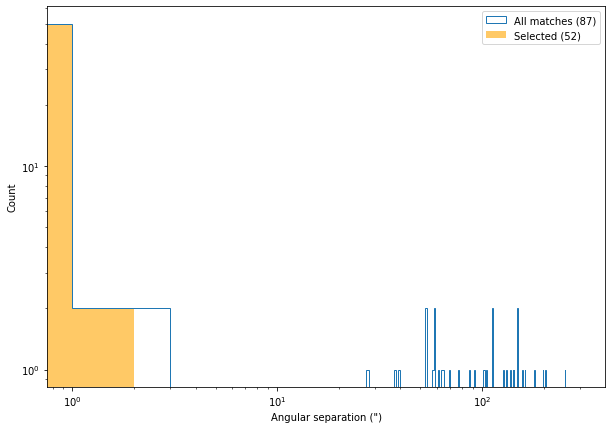

In [36]:
fig, ax = plt.subplots(figsize=(10,7))

# Histogram of distance between sources (image vs catalog)
sep_range = [0,300]
sep_bins = sep_range[1]
ax.hist(xm_ang_distance.to_value()*3600, range=sep_range, bins=sep_bins, color='tab:blue', histtype='step', label='All matches ({:})'.format(len(xm_ang_distance)))
ax.hist(xm_ang_distance[sep_constraint].to_value()*3600, range=sep_range, bins=sep_bins, color='orange', alpha=0.6, label='Selected ({:})'.format(len(xm_ang_distance[sep_constraint])))

ax.set_xlabel('Angular separation (")')
ax.set_ylabel('Count')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper right')

La imagen que estamos analizando fue tomada para medir la curva de luz de la estrella variable AO Ser. Vamos a hacer una petición simple al <a href="https://cds.u-strasbg.fr/">CDS</a> (con su interface simple <a href="http://simbad.u-strasbg.fr/simbad/">SIMBAD</a>) para conocer sus coordenadas, e identificar nuestra fuente entre todas.

In [37]:
from astroquery.simbad import Simbad

# Query CDS from the identifier (note that spaces were written as underscores)
CZAqr = Simbad.query_object("CZ_Aqr")
CZAqr

# Target coordinates
target_coord = SkyCoord(ra=CZAqr['RA'], dec=CZAqr['DEC'], unit=(u.hourangle, u.deg))
target_coord

# Cross-match with apertures
czaqr_id, czaqr_ang_distance, _ = target_coord.match_to_catalog_sky(coord_apertures, nthneighbor=1)

# Add a column for identification
phot_table['type'] = 'ref_star'
phot_table['type'][czaqr_id[0]] = 'CZ Aqr'


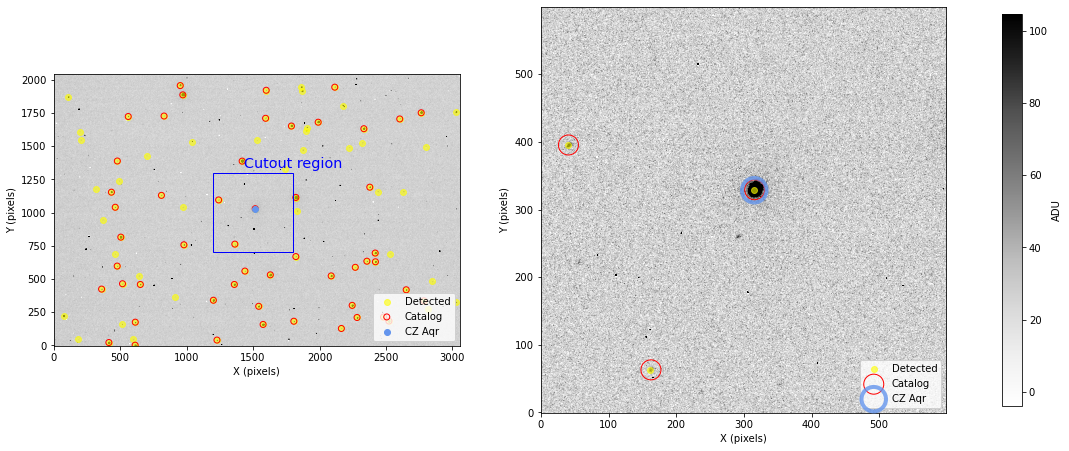

In [38]:
from astropy.wcs.utils import skycoord_to_pixel


# Catalog to pixels
catalog_x, catalog_y = skycoord_to_pixel(coord_catalog_matches, wcs=wcs)
zoom_cat_x = catalog_x[ (catalog_x>(position[0]-size[0]/2)) &
                        (catalog_x<(position[0]+size[0]/2)) &
                        (catalog_y>(position[1]-size[1]/2)) &
                        (catalog_y<(position[1]+size[1]/2)) ] - (position[0]-size[0]/2)

zoom_cat_y = catalog_y[ (catalog_x>(position[0]-size[0]/2)) &
                        (catalog_x<(position[0]+size[0]/2)) &
                        (catalog_y>(position[1]-size[1]/2)) &
                        (catalog_y<(position[1]+size[1]/2)) ] - (position[1]-size[1]/2)


# Create figure
fig, ax = plt.subplots(1, 2, figsize=(20,12))

# Plot image
im = ax[0].imshow(hdu.data, cmap='Greys', origin='lower',
                  vmin=bkg_median-2*bkg_sigma, 
                  vmax=bkg_median+5*bkg_sigma )

# Plot Sources
ax[0].scatter(sources['xcentroid'], sources['ycentroid'], alpha=0.6, color='yellow', label='Detected')
ax[0].scatter(catalog_x, catalog_y, alpha=1, edgecolor='red', facecolor='None', label='Catalog')
ax[0].scatter(phot_table['xcenter'][czaqr_id[0]], phot_table['ycenter'][czaqr_id[0]], 
              alpha=1, edgecolor='cornflowerblue', facecolor='cornflowerblue', label='CZ Aqr')

# Indicate cutout location
rect = plt.Rectangle( [position[0]-size[0]/2., position[1]-size[1]/2.], size[0], size[1], edgecolor='b', facecolor='None' )
ax[0].add_patch(rect)
ax[0].text( position[0]+size[0]/2., position[1]+size[1]/2.+40, 'Cutout region', color='b',fontsize='x-large', ha='center')

ax[0].set_xlabel('X (pixels)')
ax[0].set_ylabel('Y (pixels)')
ax[0].legend(loc='lower right')




# Plot cutout
im = ax[1].imshow(zoom_hdu.data, cmap='Greys', origin='lower',
          vmin=bkg_median-2*bkg_sigma, 
          vmax=bkg_median+5*bkg_sigma )
ax[1].scatter(zoom_sources['xcentroid'], zoom_sources['ycentroid'], alpha=0.6, color='yellow', label='Detected')
ax[1].scatter(zoom_cat_x, zoom_cat_y, alpha=1, edgecolor='red', facecolor='None', s=400, label='Catalog')
ax[1].scatter(phot_table['xcenter'][czaqr_id[0]].value - (position[0]-size[0]/2),
              phot_table['ycenter'][czaqr_id[0]].value - (position[1]-size[1]/2),
              alpha=0.8, edgecolor='cornflowerblue', facecolor='none', s=600, label='CZ Aqr', linewidth=4)

ax[1].legend(loc='lower right')
ax[1].set_xlabel('X (pixels)')
ax[1].set_ylabel('Y (pixels)')
fig.colorbar(im, ax=ax, shrink=0.6, label='ADU' )

Comparamos ahora las magnitudes instrumentales y las del catálogo

In [39]:
exptime = hdu.header.get('EXPTIME')
ins_mag = -2.5*np.log10( phot_table[sep_constraint]['aper_sum_bkgsub']/exptime )
cat_mag = catalog['Vmag'][xm_id[sep_constraint]]

ins_err = ins_mag - -2.5*np.log10( (phot_table[sep_constraint]['aper_sum_bkgsub']+phot_table[sep_constraint]['noise'])/exptime )
cat_err = catalog['e_Vmag'][xm_id[sep_constraint]]

phot_table['ins_mag'] = 0
phot_table['ins_mag'][sep_constraint] = ins_mag

C:\Users\amrd_\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


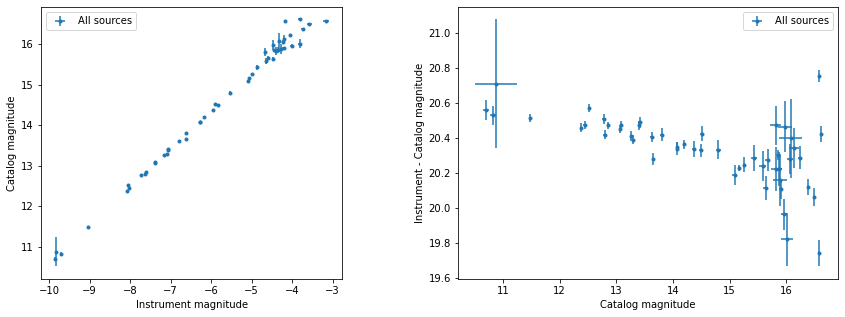

In [40]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# Instrumental vs catalog mag
ax[0].errorbar(ins_mag, cat_mag, xerr=ins_err, yerr=cat_err, marker='.', linestyle='none', label='All sources')
ax[0].set_xlabel('Instrument magnitude')
ax[0].set_ylabel('Catalog magnitude')
ax[0].legend(loc='best')
ax[0].set_aspect('equal')

# Magnitude difference as function of catalog magnitude
ax[1].errorbar(cat_mag, cat_mag-ins_mag, xerr=cat_err, yerr=(cat_err+ins_err), marker='.', linestyle='none', label='All sources')
ax[1].set_xlabel('Catalog magnitude')
ax[1].set_ylabel('Instrument - Catalog magnitude')
ax[1].legend(loc='best')

fig.savefig('phot_cal.png', facecolor='white')

[0.05982133] 0.09198627065621466
Photometric calibration:
  Linear Slope: 0.935
  Linear ZP   : 19.964
  RANSAC Slope: 0.935
  RANSAC ZP   : 19.964
  sigma  ZP   : 0.092


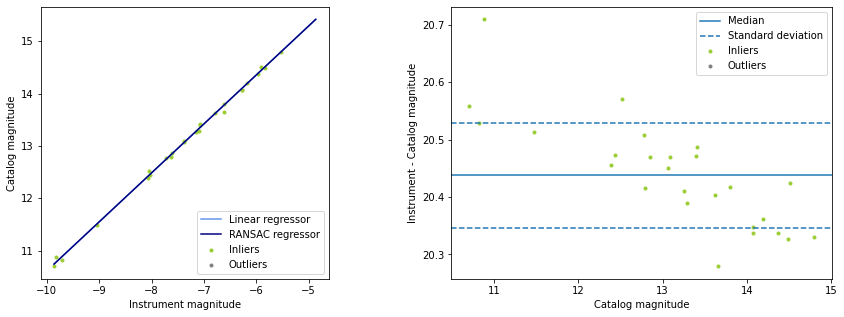

In [41]:
from sklearn import linear_model

# Selection from magnitude range
mag_min, mag_max = 10, 15
cond = (cat_mag>mag_min) & (cat_mag<mag_max) & \
       (~cat_mag.mask) & (~np.isnan(ins_mag))

# Create two mock arrays for linear regression
X = ins_mag[cond].reshape(-1, 1)
y = cat_mag[cond].reshape(-1, 1)


# Simple linear regression
linear = linear_model.LinearRegression()
linear.fit(X, y)


# sigma clipping pour choisir le threshold
from scipy import stats
MAD = stats.median_abs_deviation(X-y)
_, _, sig = sigma_clipped_stats(X-y)

print( MAD, sig)


# RANSAC linear regressions
ransac = linear_model.RANSACRegressor(residual_threshold=3*MAD)
# ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

# Results
print('Photometric calibration:')
print( f'  Linear Slope: {linear.coef_[0][0]:.3f}')
print( f'  Linear ZP   : {linear.intercept_[0]:.3f}')
print( f'  RANSAC Slope: {ransac.estimator_.coef_[0][0]:.3f}')
print( f'  RANSAC ZP   : {ransac.estimator_.intercept_[0]:.3f}')


# Plotting regression
# Outliers and Valid points
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Linear regressions (simple and RANSAC)
line_X = np.arange(X.min(), X.max()+1)[:, np.newaxis]
line_y_simple = linear.predict(line_X)
line_y_ransac = ransac.predict(line_X)

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot data
ax[0].scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
ax[0].scatter(X[outlier_mask], y[outlier_mask], color='gray', marker='.', label='Outliers')

# Plot regressions
ax[0].plot(line_X, line_y_simple , color='cornflowerblue',  label='Linear regressor')
ax[0].plot(line_X, line_y_ransac, color='navy', label='RANSAC regressor')

# Axes...
ax[0].legend(loc='lower right')
# ax[0].set_ylim([10,18])
ax[0].set_xlabel('Instrument magnitude')
ax[0].set_ylabel('Catalog magnitude')
ax[0].set_aspect('equal')

_, zp_median, zp_sigma = sigma_clipped_stats(y-X, sigma=3)
ax[1].scatter(y[inlier_mask], y[inlier_mask]-X[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
ax[1].scatter(y[outlier_mask], y[outlier_mask]-X[outlier_mask], color='gray', marker='.', label='Outliers')
ax[1].set_xlabel('Catalog magnitude')

ax[1].axhline(zp_median, label='Median')
ax[1].axhline(zp_median+zp_sigma, linestyle='--', label='Standard deviation')
ax[1].axhline(zp_median-zp_sigma, linestyle='--')
print( f'  sigma  ZP   : {zp_sigma:.3f}')

ax[1].set_ylabel('Instrument - Catalog magnitude')
ax[1].legend(loc='best')

In [42]:
# Positive values
positive = np.where( phot_table['aper_sum_bkgsub']>0 )

# Compute calibrated mag
phot_table['mag'] = 0.
phot_table['mag'][positive] = ransac.predict( (-2.5*np.log10( phot_table[positive]['aper_sum_bkgsub']/exptime)).data.reshape(-1,1)).flatten()

cond = phot_table['mag']>0
phot_table2 = phot_table[cond]
phot_table

id,xcenter,ycenter,aperture_sum,annulus_median,aper_bkg,aper_sum_bkgsub,noise,SNR,ra,dec,type,ins_mag,mag
,pix,pix,,,,,,,,,,,
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,int32,float64
1,612.689031329527,2.233351334663244,45354.28752426179,11.131204605102539,5061.979294012924,40292.30823024886,212.96546087162065,189.19644558953988,350.4159875405054,-15.796398333079642,ref_star,-6,13.77013357983532
2,415.1208255218963,22.167545828043128,116311.19345087938,33.305747985839844,15145.980390895966,101165.21305998342,341.04426904857877,296.6336697057159,350.419180327152,-15.765071258200155,ref_star,-7,12.835507650015229
3,1227.9141904990347,41.2381132369619,18753.812876127653,26.79669189453125,12185.949708981349,6567.8631671463045,136.9445613236526,47.96001464873016,350.4226988097714,-15.893906045300765,ref_star,-4,15.61175392543416
4,185.91714132448567,49.42395444635956,13309.622580584019,27.22247886657715,12379.578782618966,930.0437979650524,115.36733758124099,8.061586732120961,350.4235633005569,-15.72872616587501,ref_star,0,17.596259499593625
5,599.9535133274479,49.54081146119617,14741.91586153244,27.526360511779785,12517.770707969185,2224.145153563255,121.41629158202963,18.318341999933413,350.42377505131304,-15.794358429839267,ref_star,0,16.711073944283896
6,2164.039991804006,129.73266588599046,14649.456775213293,27.099821090698242,12323.799453806334,2325.6573214069595,121.0349403073893,19.21475993213652,350.4377304354929,-16.04226042238026,ref_star,-3,16.665763622371284
7,1575.2274439861014,158.63080590905042,94254.63561071848,29.00289535522461,13189.233417493017,81065.40219322547,307.0091783818824,264.04879039932115,350.4422141810212,-15.948908751093883,ref_star,-7,13.060382390543758
8,513.6444502943614,161.57554422304693,14628.518824195951,26.114981651306152,11875.938056321571,2752.5807678743804,120.94841389698317,22.758303967664006,350.4421900923081,-15.780625783278797,ref_star,0,16.49465860339239
